# AIRBNB DATA CLEANING

### About Data

##### The data had two tables after cleaning and merging the data we have  11922 rows and 96 columns  and the data have 11 categorical features and 17 numerical features

In [6]:
listing.shape

(11922, 96)

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

In [3]:
#importing the data in jupyter 
listing=pd.read_csv(r'C:\Users\USER\Desktop\Airbnb\listings.csv')
df=listing

In [3]:
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,6,https://www.airbnb.com/rooms/6,20181115100559,2018-11-15,Large Craftsmen w/ yard ~ Perfect for families,Our Beautiful Craftsmen house has all the mode...,"We are located in the heart of North Park, the...",Our Beautiful Craftsmen house has all the mode...,none,"We have the best Neighborhood in San Diego, in...",...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",t,f,strict_14_with_grace_period,f,f,1,1.18
1,5570,https://www.airbnb.com/rooms/5570,20181115100559,2018-11-15,Ocean front condo on the sand,Missionbeachretreat. Great Ocean Front Condo...,This charming two bedroom beachfront condomini...,Missionbeachretreat. Great Ocean Front Condo...,none,While some may compare San Diego’s Mission Bea...,...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,2,NaN
2,8095,https://www.airbnb.com/rooms/8095,20181115100559,2018-11-15,Sunset Cliffs Studio,NaN,"Newly renovated, detached studio with private ...","Newly renovated, detached studio with private ...",none,"proximity to ocean , walkability to ocean beac...",...,f,NaN,"{""SAN DIEGO"","" SAN DIEGO TOURISM MARKETING DIS...",f,f,strict_14_with_grace_period,f,f,1,1.56


In [4]:
df.shape

(11922, 96)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11922 entries, 0 to 11921
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                11922 non-null  int64  
 1   listing_url                       11922 non-null  object 
 2   scrape_id                         11922 non-null  int64  
 3   last_scraped                      11922 non-null  object 
 4   name                              11920 non-null  object 
 5   summary                           11509 non-null  object 
 6   space                             8762 non-null   object 
 7   description                       11769 non-null  object 
 8   experiences_offered               11922 non-null  object 
 9   neighborhood_overview             7593 non-null   object 
 10  notes                             6270 non-null   object 
 11  transit                           7080 non-null   object 
 12  acce

In [6]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [7]:
#Let's select the columns which we need for further analysis

selected_columns =['id','name','host_id', 'host_name', 
      'host_is_superhost','neighbourhood_cleansed','city', 'state', 
      'country', 'latitude', 'longitude',
      'property_type', 'room_type', 'accommodates',
      'bathrooms', 'bedrooms', 'beds', 'amenities',
      'price', 'weekly_price', 'monthly_price','maximum_nights','minimum_nights',
      'cleaning_fee', 'number_of_reviews', 'reviews_per_month']

df_new=df[selected_columns]

# Handling Missing, Improper Format 

In [8]:
#lets us check the missing values
df_new.isnull().sum()

id                            0
name                          2
host_id                       0
host_name                     6
host_is_superhost             6
neighbourhood_cleansed        0
city                          0
state                         4
country                       0
latitude                      0
longitude                     0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                     4
bedrooms                      5
beds                          8
amenities                     0
price                         0
weekly_price              10675
monthly_price             10879
maximum_nights                0
minimum_nights                0
cleaning_fee               1691
number_of_reviews             0
reviews_per_month          2163
dtype: int64

In [9]:
df_new.head(2)

,id,name,host_id,host_name,host_is_superhost,neighbourhood_cleansed,city,state,country,latitude,...,beds,amenities,price,weekly_price,monthly_price,maximum_nights,minimum_nights,cleaning_fee,number_of_reviews,reviews_per_month
0,6,Large Craftsmen w/ yard ~ Perfect for families,29,Sara,t,North Hills,San Diego,CA,United States,32.753993,...,4.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",$295.00,NaN,NaN,30,2,$85.00,149,1.18
1,5570,Ocean front condo on the sand,8435,Jef Karchin'S MISSIONBEACHRETREAT,f,Mission Bay,San Diego,CA,United States,32.784304,...,4.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...","$2,050.00",NaN,NaN,365,3,$150.00,0,NaN


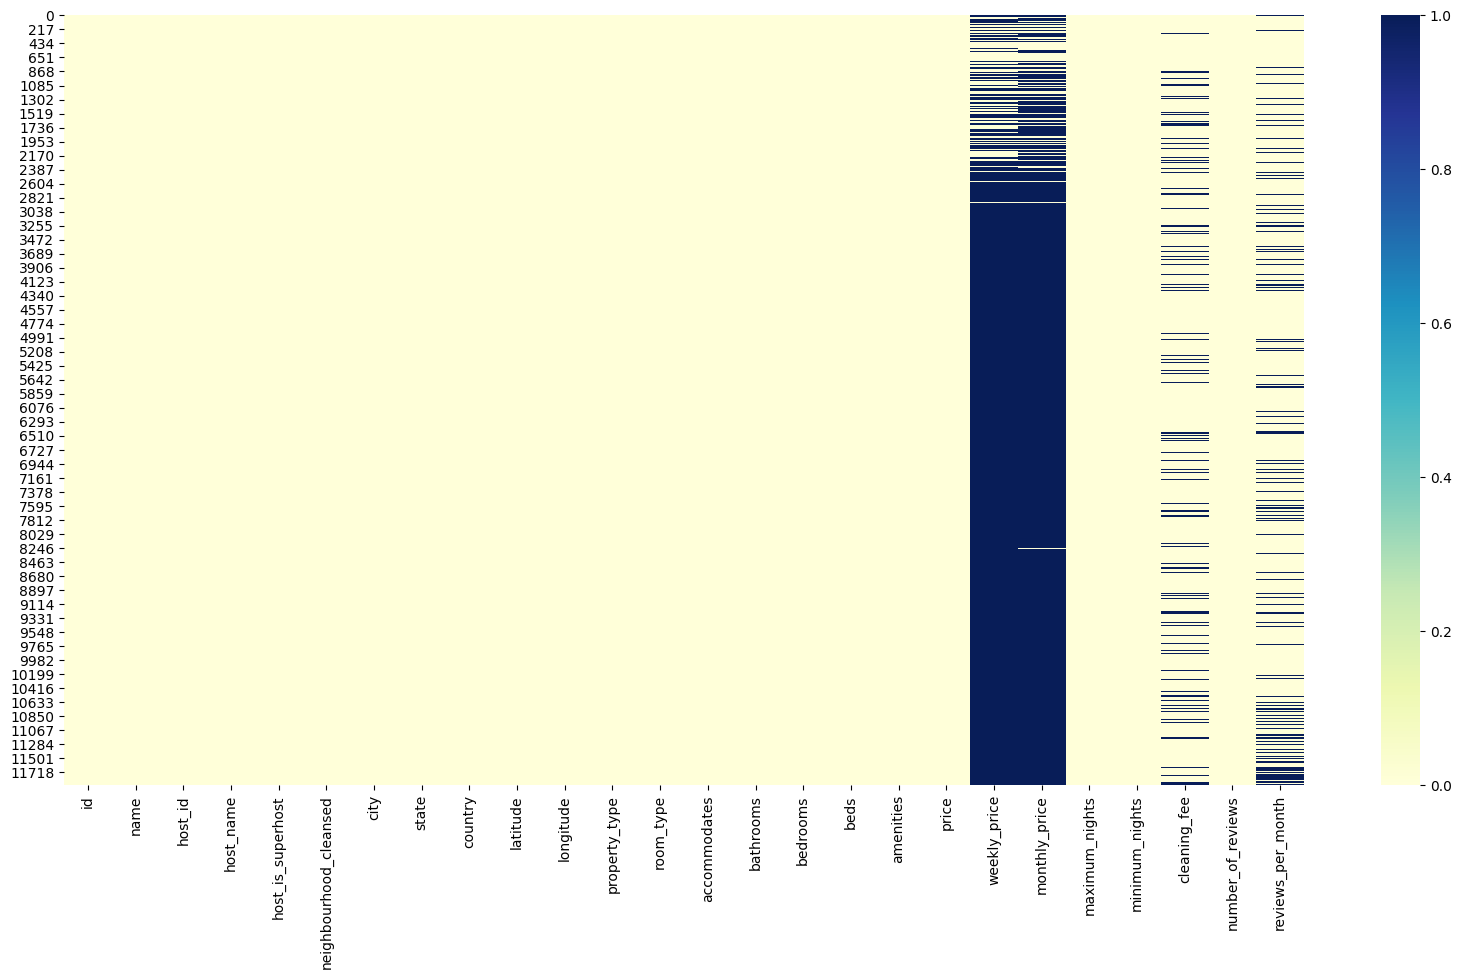

In [10]:
#lets plot a heatmap to check the missing values
plt.figure(figsize=(20,10))
sns.heatmap(df_new.isnull(),cmap='YlGnBu')
plt.show()

In [11]:
#le
df_new['price'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0          $295.00
1        $2,050.00
2           $84.00
3           $69.00
4          $160.00
           ...    
11917       $70.00
11918      $150.00
11919       $32.00
11920       $32.00
11921       $55.00
Name: price, Length: 11922, dtype: object>

In [12]:
#Lets check our currency tables first and then we will format it
currency=['price','weekly_price','monthly_price','cleaning_fee']
df_new[currency] 

,price,weekly_price,monthly_price,cleaning_fee
0,$295.00,NaN,NaN,$85.00
1,"$2,050.00",NaN,NaN,$150.00
2,$84.00,NaN,NaN,$40.00
3,$69.00,$450.00,NaN,$25.00
4,$160.00,"$1,060.00",NaN,$35.00
...,...,...,...,...
11917,$70.00,NaN,NaN,NaN
11918,$150.00,NaN,NaN,$50.00
11919,$32.00,NaN,NaN,$75.00
11920,$32.00,NaN,NaN,$65.00


##### ^^^^As we can see there are some puncations, symbols and Nan values are present. Now lets clean and transform the data and convert it to an integer

In [13]:
#lets clean the data in one shot 

for i in currency:
    df_new[i]=df_new[i].str.replace('$','')
    df_new[i]=df_new[i].str.replace(',','')
    df_new[i]=df_new[i].astype(float)
    df_new[i].fillna(0,inplace=True)
    df_new[i]=df_new[i].astype(int)
    

In [14]:
#currency=['price','weekly_price','monthly_price','cleaning_fee']
df_new[currency] 

,price,weekly_price,monthly_price,cleaning_fee
0,295,0,0,85
1,2050,0,0,150
2,84,0,0,40
3,69,450,0,25
4,160,1060,0,35
...,...,...,...,...
11917,70,0,0,0
11918,150,0,0,50
11919,32,0,0,75
11920,32,0,0,65


In [15]:
df_new.head(3)

,id,name,host_id,host_name,host_is_superhost,neighbourhood_cleansed,city,state,country,latitude,...,beds,amenities,price,weekly_price,monthly_price,maximum_nights,minimum_nights,cleaning_fee,number_of_reviews,reviews_per_month
0,6,Large Craftsmen w/ yard ~ Perfect for families,29,Sara,t,North Hills,San Diego,CA,United States,32.753993,...,4.0,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",295,0,0,30,2,85,149,1.18
1,5570,Ocean front condo on the sand,8435,Jef Karchin'S MISSIONBEACHRETREAT,f,Mission Bay,San Diego,CA,United States,32.784304,...,4.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",2050,0,0,365,3,150,0,NaN
2,8095,Sunset Cliffs Studio,270,Marin,f,Ocean Beach,San Diego,CA,United States,32.735170,...,1.0,"{Internet,Wifi,Kitchen,""Free parking on premis...",84,0,0,14,2,40,178,1.56


In [16]:
df_new.isnull().sum()

id                           0
name                         2
host_id                      0
host_name                    6
host_is_superhost            6
neighbourhood_cleansed       0
city                         0
state                        4
country                      0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    4
bedrooms                     5
beds                         8
amenities                    0
price                        0
weekly_price                 0
monthly_price                0
maximum_nights               0
minimum_nights               0
cleaning_fee                 0
number_of_reviews            0
reviews_per_month         2163
dtype: int64

In [17]:
#lets remove the NAN values from rest features
df_new['bathrooms'].fillna(0,inplace=True)
df_new['bedrooms'].fillna(0,inplace=True)
df_new['beds'].fillna(0,inplace=True)
df_new['reviews_per_month'].fillna(0,inplace=True)

In [18]:
#t=true & f=false
df_new['host_is_superhost'].fillna('f', inplace=True) 

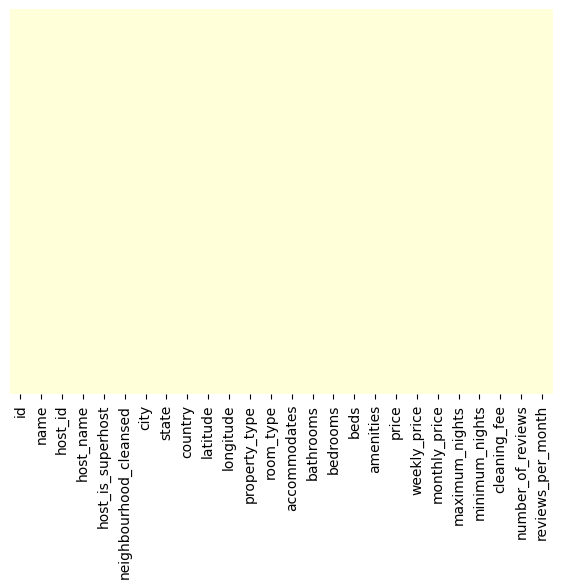

In [19]:
#lets plot a heatmap to check the missing values
plt.figure(figsize=(7,5))
sns.heatmap(df_new.isnull(),cmap='YlGnBu',cbar=False,yticklabels=False)
plt.show()

##### ^^^ Loks clean

In [20]:
#Now lets check format of categorical values 
df_new['city'].unique()

array(['San Diego', 'La Jolla', 'La Jolla ', 'Del Mar', 'Solana Beach',
       'San Diego ', 'Chula Vista', 'Oceanside', 'University heights',
       'Ocean Beach', 'la jolla', 'Mission Beach', 'San diego',
       'La jolla', 'Lemon Grove', 'Ocean Beach, San Diego', 'LA JOLLA',
       'Coronado', 'Escondido', 'Chula Vista ', 'La Jolla, San Diego',
       'Alpine', 'La Mesa', 'SAN DIEGO', 'Del Mar Highlands ',
       'San Diego, CA, United States', 'San Diego, California, US',
       'سان دييغو', 'Pacific Beach', 'Chula Vista,', ' La Jolla',
       'La Jolla Shores', 'Mission Bay', 'Bonita', 'Newport Beach',
       'Santee', 'National City', 'Gas lamp San Diego', 'Pacific Beach ',
       'San DIego', 'CA', 'Chula Vista (Eastlake)', 'SanDiego',
       'Spring Valley', 'Tijuana', 'Sandiego', 'Imperial Beach'],
      dtype=object)

###### ^^^There are duplicate values in city  lets clean it


In [21]:
df_new.city=[i.title().strip() for i in df_new['city']]

In [22]:
df_new['city'].unique()

array(['San Diego', 'La Jolla', 'Del Mar', 'Solana Beach', 'Chula Vista',
       'Oceanside', 'University Heights', 'Ocean Beach', 'Mission Beach',
       'Lemon Grove', 'Ocean Beach, San Diego', 'Coronado', 'Escondido',
       'La Jolla, San Diego', 'Alpine', 'La Mesa', 'Del Mar Highlands',
       'San Diego, Ca, United States', 'San Diego, California, Us',
       'سان دييغو', 'Pacific Beach', 'Chula Vista,', 'La Jolla Shores',
       'Mission Bay', 'Bonita', 'Newport Beach', 'Santee',
       'National City', 'Gas Lamp San Diego', 'Ca',
       'Chula Vista (Eastlake)', 'Sandiego', 'Spring Valley', 'Tijuana',
       'Imperial Beach'], dtype=object)

In [23]:
#still there are duplicate values in city let replace them
city_replacement = {
    'Ocean Beach, San Diego' : 'San Diego',
    'La Jolla, San Diego' : 'La Jolla',
    'San Diego, Ca, United States' : 'San Diego',
    'San Diego, California, Us' : 'San Diego',
    'سان دييغو' : 'San Diego',
    'La Jolla Shores' : 'San Diego',
    'Gas Lamp San Diego' : 'San Diego',
    'Ca' : 'CA',
    'Chula Vista (Eastlake)' : 'Chula Vista',
    'Chula Vista,' : 'Chula Vista',
    'Sandiego' : 'San Diego',
    'Del Mar Highlands' : 'Del Mar'
}

df_new['city'].replace(city_replacement, inplace = True)

In [24]:
df_new['city'].unique()

array(['San Diego', 'La Jolla', 'Del Mar', 'Solana Beach', 'Chula Vista',
       'Oceanside', 'University Heights', 'Ocean Beach', 'Mission Beach',
       'Lemon Grove', 'Coronado', 'Escondido', 'Alpine', 'La Mesa',
       'Pacific Beach', 'Mission Bay', 'Bonita', 'Newport Beach',
       'Santee', 'National City', 'CA', 'Spring Valley', 'Tijuana',
       'Imperial Beach'], dtype=object)

In [25]:
df_new.city.nunique()

24

In [26]:
df_new.neighbourhood_cleansed.unique()

array(['North Hills', 'Mission Bay', 'Ocean Beach', 'Loma Portal',
       'La Jolla', 'Pacific Beach', 'College Area', 'Midtown',
       'North City', 'Rancho Penasquitos', 'Grant Hill', 'Bay Park',
       'West University Heights', 'Wooded Area', 'Mira Mesa', 'Bird Land',
       'Carmel Valley', 'Talmadge', 'Moreno Mission', 'Balboa Park',
       'Kearny Mesa', 'North Clairemont', 'University City',
       'Torrey Pines', 'Little Italy', 'East Village', 'Mountain View',
       'Linda Vista', 'Old Town', 'Park West', 'Darnall', 'Scripps Ranch',
       'South Park', 'Kensington', 'Lake Murray', 'Del Mar Heights',
       'Clairemont Mesa', 'Rancho Bernadino', 'Cortez Hill',
       'Normal Heights', 'Midtown District', 'City Heights East',
       'Marina', 'La Jolla Village', 'Allied Gardens', 'Memorial',
       'Grantville', 'Roseville', 'Eastlake Vistas', 'City Heights West',
       'Encanto', 'Gaslamp Quarter', 'Bay Ho', 'Tijuana River Valley',
       'Otay Ranch', 'Webster', 'Core', '

In [27]:
df_new.isnull().sum()

id                        0
name                      2
host_id                   0
host_name                 6
host_is_superhost         0
neighbourhood_cleansed    0
city                      0
state                     4
country                   0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
amenities                 0
price                     0
weekly_price              0
monthly_price             0
maximum_nights            0
minimum_nights            0
cleaning_fee              0
number_of_reviews         0
reviews_per_month         0
dtype: int64

In [28]:
#lets check the state column
df_new.state.unique()

array(['CA', 'Ca', nan, 'Baja California', 'B.C.'], dtype=object)

In [29]:
#lets replace the values
state_replacement={'Ca':'CA',
                  'B.C.':'Baja California'}

df_new['state'].replace(state_replacement,inplace=True)
df_new.state.unique()

array(['CA', nan, 'Baja California'], dtype=object)

In [30]:
df_new.state.value_counts()

CA                 11910
Baja California        8
Name: state, dtype: int64

In [31]:
df_new.fillna('CA',inplace=True)

In [32]:
#Lets check the amenities 
df_new.amenities[1]

'{TV,"Cable TV",Internet,Wifi,Kitchen,"Free parking on premises",Elevator,Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector",Essentials,"Hair dryer",Iron,"Laptop friendly workspace",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Oven,Stove,"BBQ grill","Patio or balcony","Long term stays allowed",Waterfront,Beachfront}'

##### ^We need to strip all those unwanted brackets and quotes

In [33]:
asd=df_new['amenities'][0]
asd

'{TV,Internet,Wifi,"Air conditioning",Kitchen,"Free parking on premises","Pets allowed","Free street parking",Heating,"Family/kid friendly",Washer,Dryer,"Smoke detector","Carbon monoxide detector","First aid kit","Fire extinguisher",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Baby monitor","Outlet covers",Bathtub,"Changing table","High chair","Children’s books and toys","Babysitter recommendations",Crib,"Children’s dinnerware","Hot water","Luggage dropoff allowed",Other}'

In [34]:
asd.strip('{}').replace('"','').lower()
#Looks good

'tv,internet,wifi,air conditioning,kitchen,free parking on premises,pets allowed,free street parking,heating,family/kid friendly,washer,dryer,smoke detector,carbon monoxide detector,first aid kit,fire extinguisher,essentials,shampoo,24-hour check-in,hangers,hair dryer,iron,laptop friendly workspace,baby monitor,outlet covers,bathtub,changing table,high chair,children’s books and toys,babysitter recommendations,crib,children’s dinnerware,hot water,luggage dropoff allowed,other'

In [35]:
df_new.amenities

0        {TV,Internet,Wifi,"Air conditioning",Kitchen,"...
1        {TV,"Cable TV",Internet,Wifi,Kitchen,"Free par...
2        {Internet,Wifi,Kitchen,"Free parking on premis...
3        {Internet,Wifi,Pool,Kitchen,"Pets live on this...
4        {TV,Internet,Wifi,Kitchen,"Free parking on pre...
                               ...                        
11917    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
11918    {TV,Wifi,"Air conditioning",Kitchen,"Free park...
11919    {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...
11920    {TV,Wifi,"Air conditioning",Pool,Kitchen,"Free...
11921    {TV,Wifi,Kitchen,"Pets allowed",Heating,"Smoke...
Name: amenities, Length: 11922, dtype: object

In [36]:
df_new['amenities']=[i.strip('{}').replace('"','').lower() for i in df_new['amenities']]

In [37]:
df_new.amenities

0        tv,internet,wifi,air conditioning,kitchen,free...
1        tv,cable tv,internet,wifi,kitchen,free parking...
2        internet,wifi,kitchen,free parking on premises...
3        internet,wifi,pool,kitchen,pets live on this p...
4        tv,internet,wifi,kitchen,free parking on premi...
                               ...                        
11917    tv,cable tv,internet,wifi,air conditioning,poo...
11918    tv,wifi,air conditioning,kitchen,free parking ...
11919    tv,wifi,air conditioning,pool,kitchen,free par...
11920    tv,wifi,air conditioning,pool,kitchen,free par...
11921    tv,wifi,kitchen,pets allowed,heating,smoke det...
Name: amenities, Length: 11922, dtype: object

##### ^^^^ Now it can be used for Word Cloud visualisation

# < lets check another table we have called review >

In [38]:
reviews=pd.read_csv(r'C:\Users\USER\Desktop\Airbnb\reviews.csv')

In [39]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6,8,2008-06-22,415,Terrence,Sara is an awesome hostess. She was very cons...
1,6,4383,2009-06-22,3762,Christine,My stay at “Craftsmen” was wonderful! Sara wa...
2,6,1722383,2012-07-16,1864778,Hieu,This was my first time using Airbnb and Sara m...
3,6,5595071,2013-07-07,117966,Daryna,Sara was a very pleasant host! Reservation was...
4,6,5631156,2013-07-08,6563815,Mathew,Sara was such an amazing hostess! My girlfrien...


In [40]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344404 entries, 0 to 344403
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     344404 non-null  int64 
 1   id             344404 non-null  int64 
 2   date           344404 non-null  object
 3   reviewer_id    344404 non-null  int64 
 4   reviewer_name  344403 non-null  object
 5   comments       343987 non-null  object
dtypes: int64(3), object(3)
memory usage: 15.8+ MB


In [41]:
reviews.isnull().sum()

listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      1
comments         417
dtype: int64

In [42]:
reviews.shape

(344404, 6)

In [43]:
#Lets choose the columns we want
reviews=reviews[['listing_id','comments']].drop_duplicates('listing_id')

In [44]:
reviews

,listing_id,comments
0,6,Sara is an awesome hostess. She was very cons...
149,8095,Rocio and Marin were great hosts! \r\nThe gues...
327,39516,I don't know where to begin on how seriously h...
665,45429,Our stay with Melissa was wonderful. She was e...
671,54001,We enjoyed our trip to La Jolla. Marsha was ex...
...,...,...
344399,29881418,Vovi’s place is in an amazing location for vis...
344400,29891089,"Ultra modern home but still had a homey, welco..."
344401,29899812,"She is really welcoming and kind, and I love h..."
344402,29927527,The host canceled this reservation 5 days befo...


In [45]:
reviews.comments[0]
#Let clean this data for word cloud visualisation

'Sara is an awesome hostess.  She was very considerate, making me feel right at home.  Her suggestions of local well-known and up-and-coming hotspots were also very helpful.  Definitely a positive experience.  Her dog is a sweetie too!'

In [46]:
reviews.comments=[str(i) for i in reviews['comments']]

In [47]:
reviews.comments=[i.lower() for i in reviews['comments']]

In [48]:
reviews.comments[0]

'sara is an awesome hostess.  she was very considerate, making me feel right at home.  her suggestions of local well-known and up-and-coming hotspots were also very helpful.  definitely a positive experience.  her dog is a sweetie too!'

In [49]:
#let remove the puncations
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

In [50]:
def dataformater(comment):
    comm_list=[]
    transformed_comm=''
    
    for char in comment:
        if char not in punc:
            comm_list.append(char)
            
    for char1 in comm_list:
        transformed_comm=transformed_comm+char1
    return transformed_comm

In [51]:
reviews['comments']=reviews['comments'].apply(dataformater)

In [52]:
reviews['comments'][0]

'sara is an awesome hostess  she was very considerate making me feel right at home  her suggestions of local wellknown and upandcoming hotspots were also very helpful  definitely a positive experience  her dog is a sweetie too'

In [53]:
reviews

,listing_id,comments
0,6,sara is an awesome hostess she was very consi...
149,8095,rocio and marin were great hosts \r\nthe guest...
327,39516,i dont know where to begin on how seriously hu...
665,45429,our stay with melissa was wonderful she was ex...
671,54001,we enjoyed our trip to la jolla marsha was ext...
...,...,...
344399,29881418,vovi’s place is in an amazing location for vis...
344400,29891089,ultra modern home but still had a homey welcom...
344401,29899812,she is really welcoming and kind and i love he...
344402,29927527,the host canceled this reservation 5 days befo...


In [54]:
#lets merge two tables

In [55]:
df_new.rename(columns={'id':'listing_id'},inplace=True)

In [56]:
df_new.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'host_is_superhost',
       'neighbourhood_cleansed', 'city', 'state', 'country', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'weekly_price',
       'monthly_price', 'maximum_nights', 'minimum_nights', 'cleaning_fee',
       'number_of_reviews', 'reviews_per_month'],
      dtype='object')

In [57]:
airbnb=pd.merge(df_new,reviews,on='listing_id',how='left')

In [58]:
airbnb

,listing_id,name,host_id,host_name,host_is_superhost,neighbourhood_cleansed,city,state,country,latitude,...,amenities,price,weekly_price,monthly_price,maximum_nights,minimum_nights,cleaning_fee,number_of_reviews,reviews_per_month,comments
0,6,Large Craftsmen w/ yard ~ Perfect for families,29,Sara,t,North Hills,San Diego,CA,United States,32.753993,...,"tv,internet,wifi,air conditioning,kitchen,free...",295,0,0,30,2,85,149,1.18,sara is an awesome hostess she was very consi...
1,5570,Ocean front condo on the sand,8435,Jef Karchin'S MISSIONBEACHRETREAT,f,Mission Bay,San Diego,CA,United States,32.784304,...,"tv,cable tv,internet,wifi,kitchen,free parking...",2050,0,0,365,3,150,0,0.00,NaN
2,8095,Sunset Cliffs Studio,270,Marin,f,Ocean Beach,San Diego,CA,United States,32.735170,...,"internet,wifi,kitchen,free parking on premises...",84,0,0,14,2,40,178,1.56,rocio and marin were great hosts \r\nthe guest...
3,39516,Art Studio Retreat/Rustic Cabin,169649,Chris And Jean,t,North Hills,San Diego,CA,United States,32.731884,...,"internet,wifi,pool,kitchen,pets live on this p...",69,450,0,7,3,25,338,3.33,i dont know where to begin on how seriously hu...
4,45429,OB cottage SD--view on waterway,197919,Melissa,f,Loma Portal,San Diego,CA,United States,32.748768,...,"tv,internet,wifi,kitchen,free parking on premi...",160,1060,0,5,2,35,6,0.06,our stay with melissa was wonderful she was ex...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11917,30046180,Fully Furnished Private Room with Private Bath,97914402,Julie,f,University City,San Diego,CA,United States,32.857103,...,"tv,cable tv,internet,wifi,air conditioning,poo...",70,0,0,365,21,0,0,0.00,NaN
11918,30047177,Your home away from home for Thanksgiving!,33820940,Iva,f,Midtown,San Diego,CA,United States,32.739573,...,"tv,wifi,air conditioning,kitchen,free parking ...",150,0,0,1125,1,50,0,0.00,NaN
11919,30048505,Clean Bright and Simple,200239871,Omar,f,East Lake,Chula Vista,CA,United States,32.663647,...,"tv,wifi,air conditioning,pool,kitchen,free par...",32,0,0,30,1,75,0,0.00,NaN
11920,30048809,Cozy pillow top air mattress,200239871,Omar,f,East Lake,Chula Vista,CA,United States,32.663964,...,"tv,wifi,air conditioning,pool,kitchen,free par...",32,0,0,30,1,65,0,0.00,NaN


# Everything looks good now lets export the file for the analysis part

In [59]:
airbnb.to_csv("airbnb_cleaned.csv", index=None)